In [194]:
import numpy as np
from scipy.special import softmax

# Input Embedding

In [195]:
# These are the word embeddings of only 3 tokens with their positions in input
inp_emb1, pos1 = np.array([1,2,3,4]), 1
inp_emb2, pos2 = np.array([4,5,2,3]), 2
inp_emb3, pos3 = np.array([6,1,2,2]), 3

In [196]:
# The dimension for model is 5, for simplicity.
dim_model = 4

# Positional Encoding

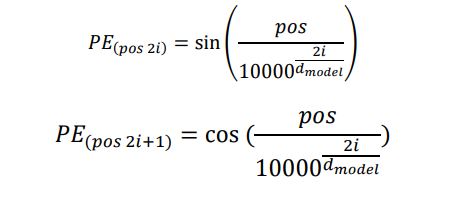

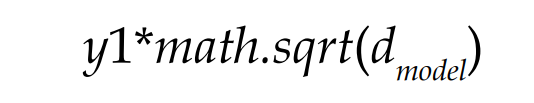

In [197]:
def positional_encoding(inp_emb, pos):
    """
    This function outputs the positional encoding of the inputs.
    It first calculates the positional vector for each input using
    sin and cos functions. Then, adds the positional vector to a
    transformed word embedding.
    The transformed word embedding retains the word embedding info
    without being minimised by position information.
    """
    pos_enc = [0]*dim

    for i in range(0, dim-1, 2):
        term = pos/(10000**((2*i)/dim))
        pos_enc[i] = np.sin(term)
        pos_enc[i+1] = np.cos(term)

        transformed_word_emb = inp_emb*math.sqrt(dim)
        pos_enc[i] = pos_enc[i] + transformed_word_emb[i]
        pos_enc[i+1] = pos_enc[i+1] + transformed_word_emb[i+1]

    
    return pos_enc

In [198]:
pos_enc1 = positional_encoding(inp_emb1, pos1)
pos_enc2 = positional_encoding(inp_emb2, pos2)
pos_enc3 = positional_encoding(inp_emb3, pos3)

In [199]:
pos_enc1

[2.8414709848078967, 4.54030230586814, 6.000099999999834, 8.999999995]

In [200]:
pos_enc2

[8.909297426825681, 9.583853163452858, 4.000199999998666, 6.99999998]

In [201]:
pos_enc3

[12.141120008059866, 1.0100075033995546, 4.0002999999955, 4.999999955000001]

# Attention Layer

In [202]:
attention_input = np.array([pos_enc1, pos_enc2, pos_enc3])

In [203]:
attention_input

array([[ 2.84147098,  4.54030231,  6.0001    ,  8.99999999],
       [ 8.90929743,  9.58385316,  4.0002    ,  6.99999998],
       [12.14112001,  1.0100075 ,  4.0003    ,  4.99999996]])

Inside attention mechanism, each word vector has 3 representations: A query vector (Q), A key vector (K), and a value vector (V). Here,

Q = attention_input x Qw

K = attention_input x Kw

V = attention_input x Vw

Q, K, and V are obtained from matrix multiplication of wight matricex and input matrix. Here, Qw, Kw, Vw are the wights for each vector learnt and updated during training.

We initialse Qw, Kw, and Vw with random values.

In [283]:
# for future matrix multiplication the number of columns in first
#  matrix should be equal to the number of rows of the second matrix.
dim_model = 4
np.random.seed(12)
def initialise_weights(dim,n):
    Qw = np.random.randint(n, size = (dim, dim))
    Kw = np.random.randint(n, size = (dim, dim))
    Vw = np.random.randint(n, size = (dim, dim))
    return Qw, Kw, Vw

In [284]:
Qw, Kw, Vw = initialise_weights(dim_model,5)

In [285]:
Qw

array([[3, 3, 1, 2],
       [3, 3, 4, 0],
       [1, 4, 1, 2],
       [3, 2, 0, 0]])

In [286]:
Kw

array([[4, 2, 1, 3],
       [4, 3, 1, 0],
       [2, 2, 0, 4],
       [3, 1, 0, 0]])

In [287]:
Vw

array([[3, 3, 1, 3],
       [0, 1, 1, 0],
       [4, 0, 4, 1],
       [3, 4, 3, 3]])

In [289]:
Q = np.matmul(attention_input, Qw)
K = np.matmul(attention_input, Kw)
V = np.matmul(attention_input, Vw)

In [290]:
Q

array([[55.14541986, 64.14571986, 27.00278021, 17.68314197],
       [80.47965171, 85.48025173, 51.24491008, 25.81899485],
       [58.4536824 , 65.45458244, 20.18145002, 32.28284002]])

In [291]:
K

array([[ 68.52729315,  40.30404888,   7.38177329,  32.52481295],
       [102.9730023 ,  61.57055432,  18.49315059,  42.72869228],
       [ 75.60510991,  40.31286248,  13.15112751,  52.42456002]])

In [292]:
V

array([[59.52481294, 49.06471524, 58.38217328, 41.52451294],
       [63.72869222, 64.31174536, 55.49395053, 51.72809222],
       [67.42455989, 57.43336735, 44.15232738, 55.42365989]])

## Calculating attention scores

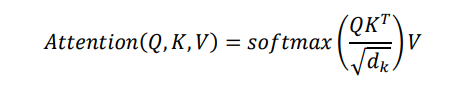

In [300]:
def attention(Q,K,V, dim):
    Q_againt_Kvalues = np.matmul(Q, K.T) / np.sqrt(dim)
    softmax_score = softmax(Q_againt_Kvalues)
    final_attention = np.matmul(softmax_score, V)
    return final_attention
    
     

In [301]:
attention(Q,K,V, dim_model)

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [63.72869222, 64.31174536, 55.49395053, 51.72809222],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])